In [10]:
# import necessary libraries
import os
import sys
import pandas as pd
import numpy as np

In [26]:
#import the dataset
data = pd.read_csv('../data/Tetuan City power consumption.csv')

In [19]:
#inspect the first few rows of the dataset
print(data.head())
#check for missing values
print(data.isnull().sum())

print(data.info())
print(data.describe())
print(data.duplicated().sum())
print(data.shape)

        DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69620                16128.87538   
1          0.085               29814.68354                19375.07599   
2          0.100               29128.10127                19006.68693   
3          0.096               28228.86076                18361.09422   
4          0.085               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0                20240.96386  
1                20131.08434  

#there are no duplicates in the date time in the data set

In [32]:
# convert the DateTime column to datetime format
data["DateTime"] = pd.to_datetime(data["DateTime"])

#set it to index
data = data.set_index("DateTime")


In [33]:
#get the intial index of the dataframe and the finel index of the dataframe
print(f"initial date: {data.index.min()}")
print(f"end date: {data.index.max()}")

initial date: 2017-01-01 00:00:00
end date: 2017-12-30 23:50:00


Missing timestamps: 0
Time differences between records:
DateTime
0 days 00:10:00    52415
Name: count, dtype: int64
Duplicate DateTime entries: 0


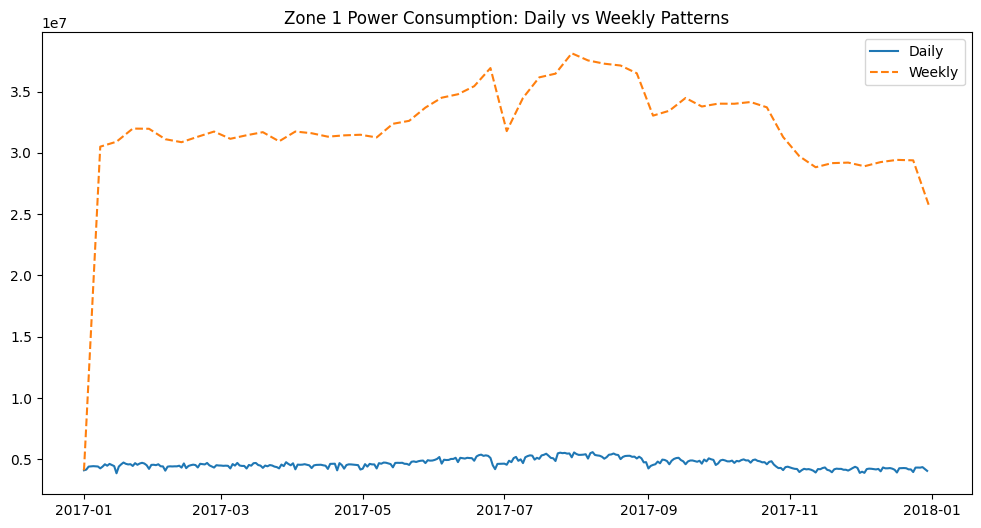

Correlation matrix:
                           Temperature  Humidity  Wind Speed  \
Temperature                   1.000000 -0.460243    0.477109   
Humidity                     -0.460243  1.000000   -0.135853   
Wind Speed                    0.477109 -0.135853    1.000000   
general diffuse flows         0.460294 -0.468138    0.133733   
diffuse flows                 0.196522 -0.256886   -0.000972   
Zone 1 Power Consumption      0.440221 -0.287421    0.167444   
Zone 2  Power Consumption     0.382428 -0.294961    0.146413   
Zone 3  Power Consumption     0.489527 -0.233022    0.278641   

                           general diffuse flows  diffuse flows  \
Temperature                             0.460294       0.196522   
Humidity                               -0.468138      -0.256886   
Wind Speed                              0.133733      -0.000972   
general diffuse flows                   1.000000       0.564718   
diffuse flows                           0.564718       1.000000   
Z

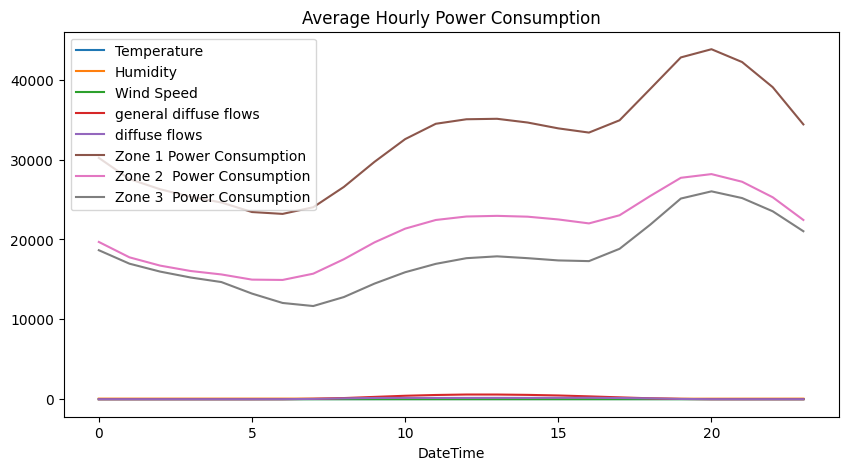

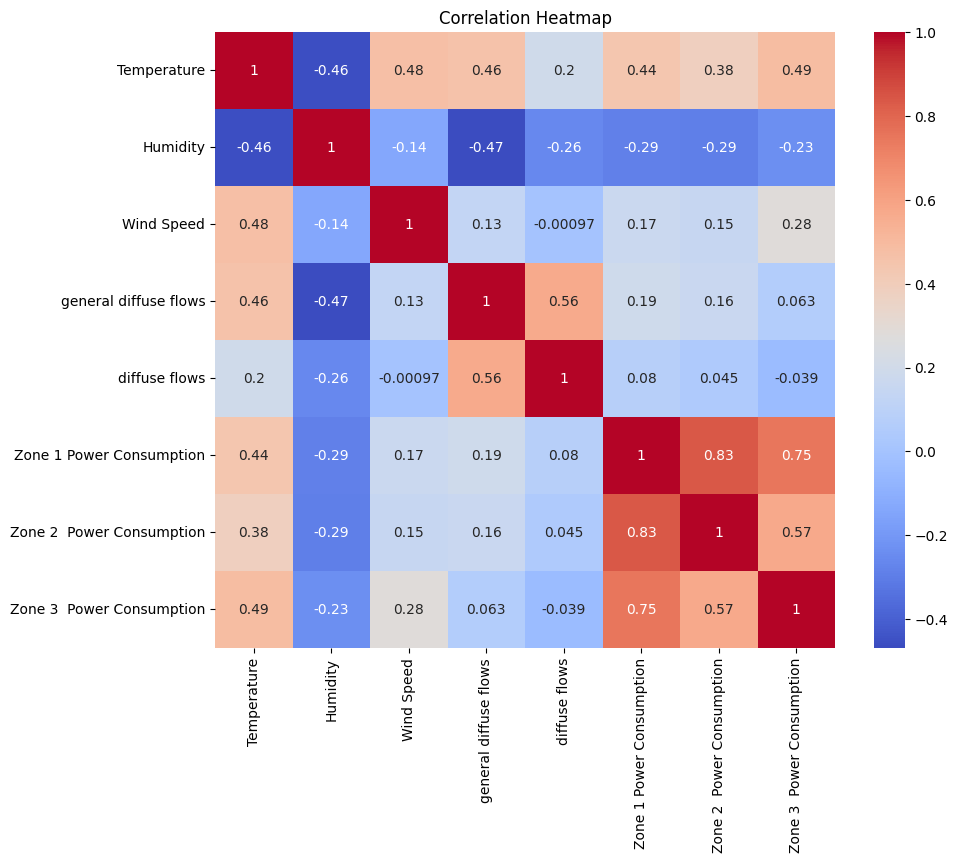

Lagged correlations:
Temperature                  0.440221
Humidity                    -0.287421
Wind Speed                   0.167444
general diffuse flows        0.187965
diffuse flows                0.080274
Zone 1 Power Consumption     1.000000
Zone 2  Power Consumption    0.834519
Zone 3  Power Consumption    0.750733
Zone 1 Lag 1                 0.996070
Zone 1 Lag 2                 0.986704
Zone 1 Lag 3                 0.973177
Zone 1 Lag 24                0.315895
Zone 1 Lag 48               -0.188509
Name: Zone 1 Power Consumption, dtype: float64
Outliers detected: 2339


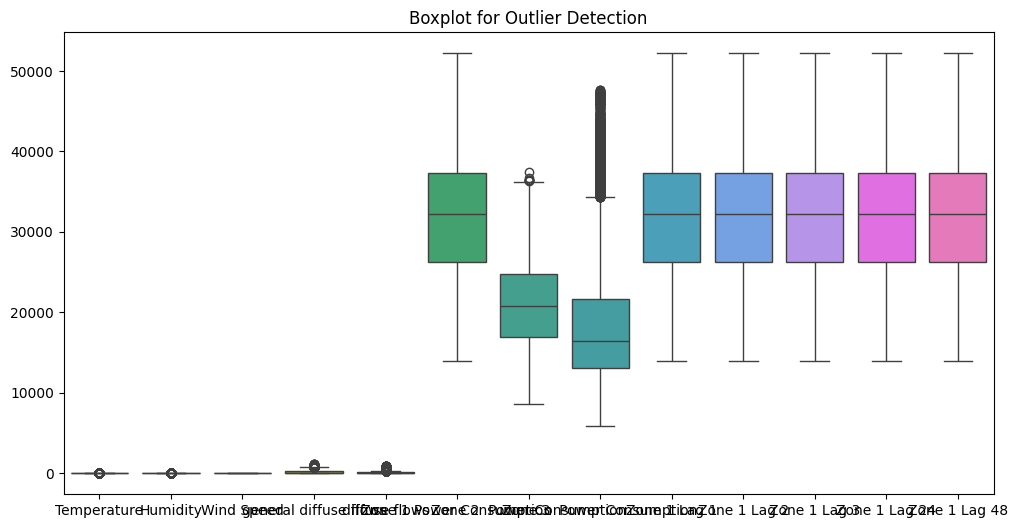

In [34]:
import seaborn as sns
from scipy.stats import zscore

# 🧭 1. Time Consistency & Structure

# Check for missing or irregular timestamps
missing_timestamps = data.index.isnull().sum()
print(f"Missing timestamps: {missing_timestamps}")

# Check sampling frequency and consistency
time_diffs = data.index.to_series().diff().value_counts()
print("Time differences between records:")
print(time_diffs)

# Check for duplicates in the DateTime index
duplicates = data.index.duplicated().sum()
print(f"Duplicate DateTime entries: {duplicates}")

# 📊 2. Temporal Trends & Seasonality

import matplotlib.pyplot as plt

# Resample data to daily and weekly frequencies
daily_consumption = data.resample('D').sum()
weekly_consumption = data.resample('W').sum()

# Plot daily and weekly patterns
plt.figure(figsize=(12, 6))
plt.plot(daily_consumption.index, daily_consumption['Zone 1 Power Consumption'], label='Daily')
plt.plot(weekly_consumption.index, weekly_consumption['Zone 1 Power Consumption'], label='Weekly', linestyle='--')
plt.title('Zone 1 Power Consumption: Daily vs Weekly Patterns')
plt.legend()
plt.show()

# Analyze seasonal and time-of-day patterns
hourly_consumption = data.groupby(data.index.hour).mean()
hourly_consumption.plot(figsize=(10, 5), title='Average Hourly Power Consumption')

# 🌦️ 3. Environmental Feature Relationships

# Correlation analysis
correlation_matrix = data.corr()
print("Correlation matrix:")
print(correlation_matrix)

# Visualize correlations with energy usage
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 🌀 4. Lag Effects & Time Dependency

# Lag analysis
lags = [1, 2, 3, 24, 48]  # Example lags in hours
for lag in lags:
    data[f'Zone 1 Lag {lag}'] = data['Zone 1 Power Consumption'].shift(lag)

# Plot lagged correlatiaons
lagged_correlation = data.corr()['Zone 1 Power Consumption']
print("Lagged correlations:")
print(lagged_correlation)

# ⚠️ 5. Data Quality & Sensor Anomalies

# Detect outliers using z-scores
z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum()
print(f"Outliers detected: {outliers}")

# Visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title('Boxplot for Outlier Detection')
plt.show()